In [154]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing

In [155]:
warnings.filterwarnings('ignore')

In [156]:
df_train = pd.read_csv('MNIST_TRAIN.csv')
df_test = pd.read_csv('MNIST_TEST.csv')

In [157]:
print('Number of NaN\'s in the training set: '); print(df_train.isnull().sum().sum());
print('Number of NaN\'s in the test set: '); print(df_test.isnull().sum().sum());

print('----------------------------------------')

print('Shape of training set: '); print(df_train.shape);
print('Shape of test set: '); print(df_test.shape);

print('----------------------------------------')

print('Summary of train set: '); print(df_train.describe().transpose());

print('----------------------------------------')

print('Summary of test set: '); print(df_test.describe().transpose());

Number of NaN's in the training set: 
0
Number of NaN's in the test set: 
0
----------------------------------------
Shape of training set: 
(60000, 785)
Shape of test set: 
(10000, 785)
----------------------------------------
Summary of train set: 
         count      mean      std  min  25%  50%  75%   max
label  60000.0  4.453933  2.88927  0.0  2.0  4.0  7.0   9.0
1x1    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
1x2    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
1x3    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
1x4    60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
...        ...       ...      ...  ...  ...  ...  ...   ...
28x24  60000.0  0.002000  0.34660  0.0  0.0  0.0  0.0  62.0
28x25  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
28x26  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
28x27  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0
28x28  60000.0  0.000000  0.00000  0.0  0.0  0.0  0.0   0.0

[785 rows x 8 columns]
-----

In [158]:
X_train = df_train.drop('label', axis = 1)
X_test = df_test.drop('label', axis = 1)

Y_train = df_train[['label']]
Y_test = df_test[['label']]

print(Y_train.head(5)); print(Y_test.head(5))

   label
0      5
1      0
2      4
3      1
4      9
   label
0      7
1      2
2      1
3      0
4      4


In [159]:
#min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit(X_train).transform(X_train)
X_test = standard_scaler.transform(X_test)

In [241]:
mcclf = LinearSVC(verbose = True, loss = 'squared_hinge', max_iter = 5, C=1, dual=True, multi_class='ovr')

In [242]:
mcclf.fit(X_train, Y_train)

[LibLinear]
optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -18.742492
nSV = 6198

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -31.191312
nSV = 6663

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -47.102244
nSV = 12076

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -70.021747
nSV = 13634

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -45.135199
nSV = 8576

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -70.984825
nSV = 13552

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -27.880904
nSV = 7331

optimization finished, #iter = 5

Using -s 2 may be faster (also see FAQ)

Objective value = -43.527158
nSV = 9067

optimization finished, #iter = 5

Using -s 2 may be faste

LinearSVC(C=1, max_iter=5, verbose=True)

Objective value = -101.321981
nSV = 14398


In [243]:
predict_train = mcclf.predict(X_train)
predict_test = mcclf.predict(X_test)

In [244]:
print('Confusion Matrix of Train Set:'); print(confusion_matrix(Y_train, predict_train))
print('Classification Report of Train Set:'); print(classification_report(Y_train, predict_train))

print('------------------------------------------')

print('Confusion Matrix of Test Set:'); print(confusion_matrix(Y_test, predict_test))
print('Classification Report of Test Set:'); print(classification_report(Y_test, predict_test))

Confusion Matrix of Train Set:
[[5558    6   49   40   20  117   75   20   33    5]
 [   1 6590   26   17    4   24   13    9   52    6]
 [  31  110 5073  136  105   63  149   61  193   37]
 [  36   68  192 4940   21  499   53   64  186   72]
 [   7   66   41   39 5009  128   38   20  185  309]
 [  37   54   50  157  119 4658  105   22  171   48]
 [  26   49   63    7   29   98 5585    5   49    7]
 [   5   91   87   49   93  132   22 5590   28  168]
 [  62  174   91  124   31  273   54   27 4958   57]
 [  27   82   36  117  114  327   41  231  298 4676]]
Classification Report of Train Set:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5923
           1       0.90      0.98      0.94      6742
           2       0.89      0.85      0.87      5958
           3       0.88      0.81      0.84      6131
           4       0.90      0.86      0.88      5842
           5       0.74      0.86      0.79      5421
           6       0.91

In [245]:
print('Score of the train set: '); print(mcclf.score(X_train, Y_train))
print('Score of the test set: '); print(mcclf.score(X_test, Y_test))

Score of the train set: 
0.8772833333333333
Score of the test set: 
0.8745


In [246]:
Y_train_modified = Y_train.to_numpy()
Y_test_modified = Y_test.to_numpy()

Y_train_modified = np.sort(Y_train_modified, axis=0, kind = 'mergesort')
Y_test_modified = np.sort(Y_test_modified, axis=0, kind = 'mergesort')

print(np.array(np.unique(Y_train_modified, return_counts=True)))
print(np.array(np.unique(Y_test_modified, return_counts=True)))

[[   0    1    2    3    4    5    6    7    8    9]
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]]
[[   0    1    2    3    4    5    6    7    8    9]
 [ 980 1135 1032 1010  982  892  958 1028  974 1009]]


<BarContainer object of 10 artists>

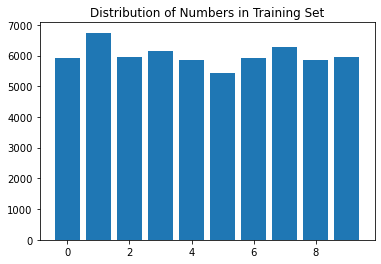

In [237]:
plt.title('Distribution of Numbers in Training Set')
plt.bar(np.array(np.unique(Y_train_modified, return_counts=True))[0], np.array(np.unique(Y_train_modified, return_counts=True))[1])

<BarContainer object of 10 artists>

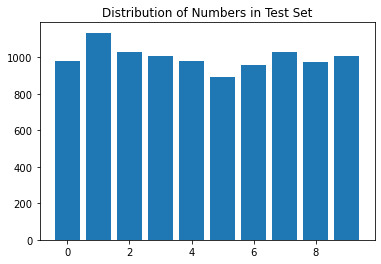

In [238]:
plt.title('Distribution of Numbers in Test Set')
plt.bar(np.array(np.unique(Y_test_modified, return_counts=True))[0], np.array(np.unique(Y_test_modified, return_counts=True))[1])